# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 1: Scoping an analytics project

## Group members 
- Group member 
    - Name: Amira Bendjama
    - Email: ab4745@drexel.edu
- Group member 
    - Name: Thuy Hong Doan
    - Email: td688@drexel.edu
- Group member 
    - Name: Alsulami Meznah
    - Email: mha54@drexel.edu

## Team members background:

- __Amira Bendjama__: is an Algerian Fulbrighter with a bachelor’s in computer science, and a master’s in networks and distributed systems. Her skill set varies from different programming languages to problem-solving and critical thinking. She worked with Youtube API V3 to retrieve the dataset for [Valorant comments on Youtube](https://github.com/amira-bendjama/VALORANT-COMMENTS). 

- __Alsulami Meznah__: is a graduate student in Data Science. She majored in a bachelor's degree in Information Systems.  She has a good background in Java, Visual Basic, and SQL. She looks forward to improving my skills and learning more about Python and R.

- __Thuy Hong Doan__: graduated with a bachelor of business administration in Computer Information Systems. Her skill set varies from different programming languages to analytical and problem-solving skills. She worked with HTML, CSS, SQL, JavaScript, and Python. She plans to use her previous coding experience and understanding of data structure to help successfully complete this project.

### Growth area 

We are looking to take on a project that presents real-world data analysis challenges in order to align our skills with the type of work we would undertake in the professional world. Analyzing a dataset is particularly challenging because of the different steps to take before actually analyzing the dataset such as cleaning the dataset, and checking the correctness, and thus is a good way to learn about data analysis.

## Topic Summary 

YouTube is one of the leading video-sharing and social media platforms in the world. Thus, It had a huge impact on changing the marketing strategies through video promotion or sponsoring independent Youtubers, with its captivating features such as the recommendation page, and trending page. However, the latter doesn’t have a clear indication of what makes a Youtube video trending. Hence, the speculation on what makes a video trending such as [Researching The Trending Tab (BTS)](https://www.youtube.com/watch?v=sEvtpj-uChA&ab_channel=Coffeezilla), [What Is YouTube Trending And How It Works](https://www.notion.so/project-scooping-427deb3f9cbc4c32949c17248bdc0a30#04a09cb6fee248398f38d2fa43a72052). The goal of the project is to perform EDA analysis on the dataset to find the patterns among trending videos and develop a classification model to attribute the factor that affects how popular a Youtube video will be. Those insights might be used by Youtube channels owned by traditional companies that seek to break into the new marketing field, or they can be used by individual Youtubers that seek to increase the popularity of their videos, without affecting their content creation. This project will rely on [dataset](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset) from Kaggle which was collected using the Youtube API.


## Term Project Phase 1: details 

__What is our selected dataset and why?__

The selected dataset is collected using Youtube API. It includes several months of data on daily trending YouTube videos, with up to 200 listed trending videos per day, for different regions. However, the project will focus on the United states' dataset, because of two factors: First, it is a majority English-speaking country, where English content is the most viewed and shared, and Second the USA is leading the trends in the platform and around the world. The dataset includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count, category.

__What is the availability of relevant pre-processed data?__

The dataset is available for the public on [Kaggle](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset). 

__What will the analysis do, and who/what it will support?__ 

The EDA analysis on the dataset to find the patterns among trending videos and develop a classification model to find the factors. The questions we are trying to solve are: 
1. what are the top most trending Categories? 
2. what is the impact of Likes, Dislikes and Comments.
3. what are the most used words for titles, video descriptions, and tags?

__Who would be interested in the data analysis?__

- Advertiser to sponsor Youtube videos that have the potential to be trending
- Youtube channels owned by companies that want to keep up with the trends for better-performing product ads. 
- Independent Youtubers who want to make trending videos
- Researchers to derive insight into behavior from Youtube trends and marketing strategies

__How your analysis might be completed and disseminated?__

The analysis will be shared in Kaggle and GitHub for public use.

__How your analysis might fit into an application or investigation?__ 

This analysis enables YouTube to predict the lifecycle of popular content so that it can adapt its economic strategy. YouTubers, or content creators, get money from their videos as well. For many YouTubers, YouTube is their sole source of income, and this will assist producers in analyzing their content life cycle and making necessary modifications. Feedback from viewers, for example, is a crucial part for YouTubers because it allows them to understand how their material is being received by people and shows YouTube and YouTubers how interactive features affect the performance of their videos on social networks. Also, The analysis can be helpful across other social media platforms, such as Twitch, and Facebook gaming, where the latter relay heavily on capturing the attention of live viewers, which will be suitable to implement the same factors and techniques used in most popular video streaming platform. 


__Limitations__

- The dataset is limited to several months and only 200 videos per day, and hence it could add some bias to the predictions. 
- World events that are relevant to only several months can affect the prediction greatly in a small dataset.
- Absence of a duration column in the dataset, which is considered one of the factors to impact the trending videos.

__Potential solutions__ 

- The results can be improved by extending the data collection to a few years back, 
- Improving the prediction to ignore irrelevant events. 
- Adding the duration column to the dataset


### Potential Software used 
- Juypter notebook 

### Hardware used 
- Acer processor i5 RAM 8GB
- Hp processor i7 RAM 8GB
- Macbook Pro processor i5 RAM 8GB



# Exploratory Data Analysis 

Loading the data from the CSV file and into dataframe and retrieving the categories for a specific video, we must load a JSON file since this is how the dataset was structured.

In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

US_category_id = pd.read_json('data/US_category_id.json')
trending_youtube = pd.read_csv('data/US_youtube_trending_data.csv')




Number of elements in the dataset

In [4]:
US_category_id.shape , trending_youtube.shape

((32, 3), (180390, 16))

Columns in the dataset

In [5]:
trending_youtube.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

Some of the columns are redundant for our analysis so we will drop them

In [6]:
trending_youtube.drop(['video_id','thumbnail_link', 'description'], axis=1, inplace=True)

In [7]:
trending_youtube.shape

(180390, 13)

In [8]:
trending_youtube.dtypes

title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
dtype: object

In [9]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11T19:20:14Z,2020-08-12T00:00:00Z
1,2020-08-11T17:00:10Z,2020-08-12T00:00:00Z
2,2020-08-11T16:34:06Z,2020-08-12T00:00:00Z
3,2020-08-11T16:38:55Z,2020-08-12T00:00:00Z
4,2020-08-11T15:10:05Z,2020-08-12T00:00:00Z


In [10]:
#Trending date column has object data type which needs to changed as datetime
trending_youtube['trending_date'] = pd.to_datetime(trending_youtube['trending_date'], format = "%Y-%m-%dT%H:%M:%SZ")

In [11]:
#The publishedAt column converted with the astype function
trending_youtube['publishedAt'] = trending_youtube['publishedAt'].astype('datetime64[ns]')

In [12]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11 19:20:14,2020-08-12
1,2020-08-11 17:00:10,2020-08-12
2,2020-08-11 16:34:06,2020-08-12
3,2020-08-11 16:38:55,2020-08-12
4,2020-08-11 15:10:05,2020-08-12


In [13]:
trending_youtube[['trending_date','publishedAt']].dtypes


trending_date    datetime64[ns]
publishedAt      datetime64[ns]
dtype: object

In [14]:
# create time_diff colume to calculate the difference between the time a video is published and its trending time
trending_youtube['time_diff'] = trending_youtube['trending_date'] - trending_youtube['publishedAt']
trending_youtube['time_diff'].head()

0   0 days 04:39:46
1   0 days 06:59:50
2   0 days 07:25:54
3   0 days 07:21:05
4   0 days 08:49:55
Name: time_diff, dtype: timedelta64[ns]

In [15]:
trending_youtube.channelTitle.nunique() #check the number of unique channels.

7057

In [16]:
# convert time_diff to a numerical variable to plot its distribution
#convert it to hours
trending_youtube['time_diff_hour'] = trending_youtube['time_diff'] / pd.Timedelta('1 hour')
trending_youtube['time_diff_hour'].mean()

81.59874107643314

In [17]:
#take the mean and divide by 24
trending_youtube['time_diff_hour'].mean() / 24

3.399947544851381

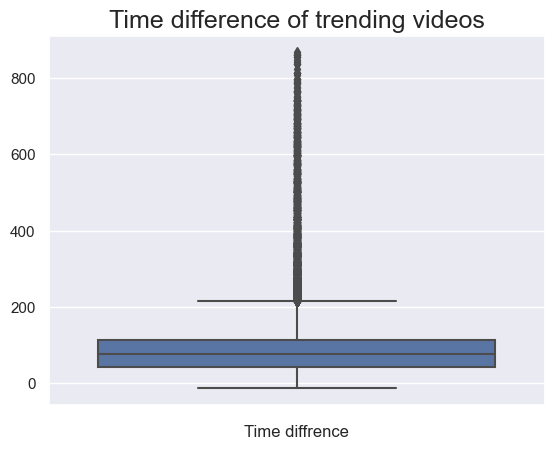

In [32]:
#use a box plot for visualization to give us an overview of the distribution
a = sns.boxplot(data=trending_youtube, y='time_diff_hour')
a.set(xlabel='Time diffrence', ylabel='')
_ = plt.title("Time difference of trending videos", fontsize = 18)

Eliminate the outliers

In [19]:
len(trending_youtube)

180390

In [20]:
len(trending_youtube[trending_youtube.time_diff_hour > 600])


193

In [21]:
len(trending_youtube[trending_youtube.time_diff_hour <= 600])


180197

compare the average views of trending videos published by these channels

In [22]:
#compare the average views of trending videos published by these channels
trending_youtube['views_mil'] = trending_youtube['view_count'] / 1000000
trending_youtube[['channelId','views_mil']].groupby('channelId')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10]

views_mil      
                               mean count
channelId                                
UCDVYQ4Zhbm3S2dlz7P1GBDg   3.821924  1222
UCWJ2lWNubArHWmf3FIHbfcQ   2.191121  1067
UCpB959t8iPrxQWj7G6n0ctQ   4.805159   595
UCqZQlzSHbVJrwrn5XvzrzcA   1.232200   541
UCIPPMRA040LQr5QPyJEbmXA  10.070149   512
UCke6I9N4KfC968-yRcd5YRg   3.817033   491
UCRijo3ddMTht_IHyNSNXpNQ   7.365383   488
UCET00YnetHT7tOpu12v8jxg   1.122511   488
UCqFzWxSCi39LnW1JKFR3efg   3.252661   483
UCX6OQ3DkcsbYNE6H8uQQuVA  30.323988   474

The number of trending videos changes over time

In [23]:
#The number of trending videos changes over time
daily = trending_youtube[['trending_date']].value_counts().reset_index()\
.sort_values(by='trending_date').reset_index(drop=True)

In [24]:
daily.head()

,trending_date,0
0,2020-08-12,200
1,2020-08-13,200
2,2020-08-14,200
3,2020-08-15,200
4,2020-08-16,200


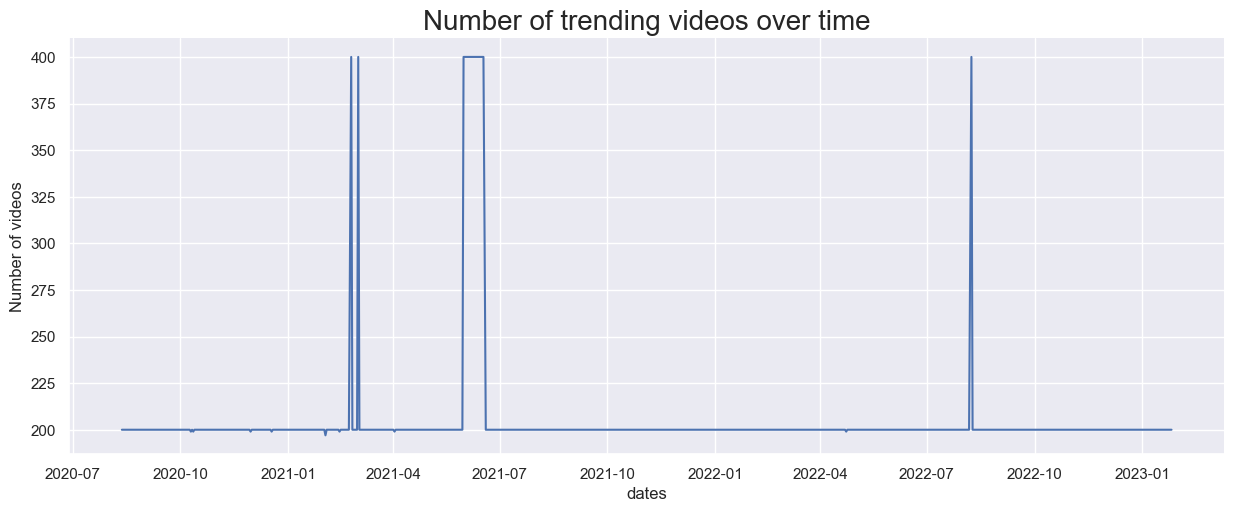

In [25]:
#Generate a line plot based over time
a = sns.relplot(data=daily, x='trending_date', y=0,
kind='line', aspect=2.5)
a.set( xlabel='dates', ylabel='Number of videos')
_ = plt.title("Number of trending videos over time", fontsize = 20)

#### What categories that youtube users in the US are interested in?

In [26]:
#creating dictionary for json file provided for category and category id
category_dict = {}
for i in US_category_id['items']:
    category_dict[i['id']] = i['snippet']['title']

In [27]:
#replacing the category id with category actual name 
def replace_categoryid(df):
    if str(df) in category_dict:
        return category_dict[str(df)]
    
trending_youtube['category'] = trending_youtube['categoryId'].apply(replace_categoryid)

In [28]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180390 entries, 0 to 180389
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   title              180390 non-null  object         
 1   publishedAt        180390 non-null  datetime64[ns] 
 2   channelId          180390 non-null  object         
 3   channelTitle       180390 non-null  object         
 4   categoryId         180390 non-null  int64          
 5   trending_date      180390 non-null  datetime64[ns] 
 6   tags               180390 non-null  object         
 7   view_count         180390 non-null  int64          
 8   likes              180390 non-null  int64          
 9   dislikes           180390 non-null  int64          
 10  comment_count      180390 non-null  int64          
 11  comments_disabled  180390 non-null  bool           
 12  ratings_disabled   180390 non-null  bool           
 13  time_diff          180390 non

In [29]:
#Groupby and sum view count, likes, dislikes, comment_count  by category 
lst = ['view_count','likes','dislikes','comment_count','category']
category_group = trending_youtube[lst].groupby('category').sum()
category_group


,view_count,likes,dislikes,comment_count
category,,,,
Autos & Vehicles,3203093015,146328549,1408858,12269306
Comedy,16846787128,1160920755,11174623,57672635
Education,7860308353,437383254,4040488,25287441
Entertainment,111485797504,5473099612,62549431,333751870
Film & Animation,16648573530,726106705,6686643,51362729
Gaming,62850477795,3422629644,38395646,260768558
Howto & Style,6443826304,332200139,7266989,24954470
Music,130640325016,8609591063,106002834,961391431
News & Politics,15670539220,202028974,9979392,44950529


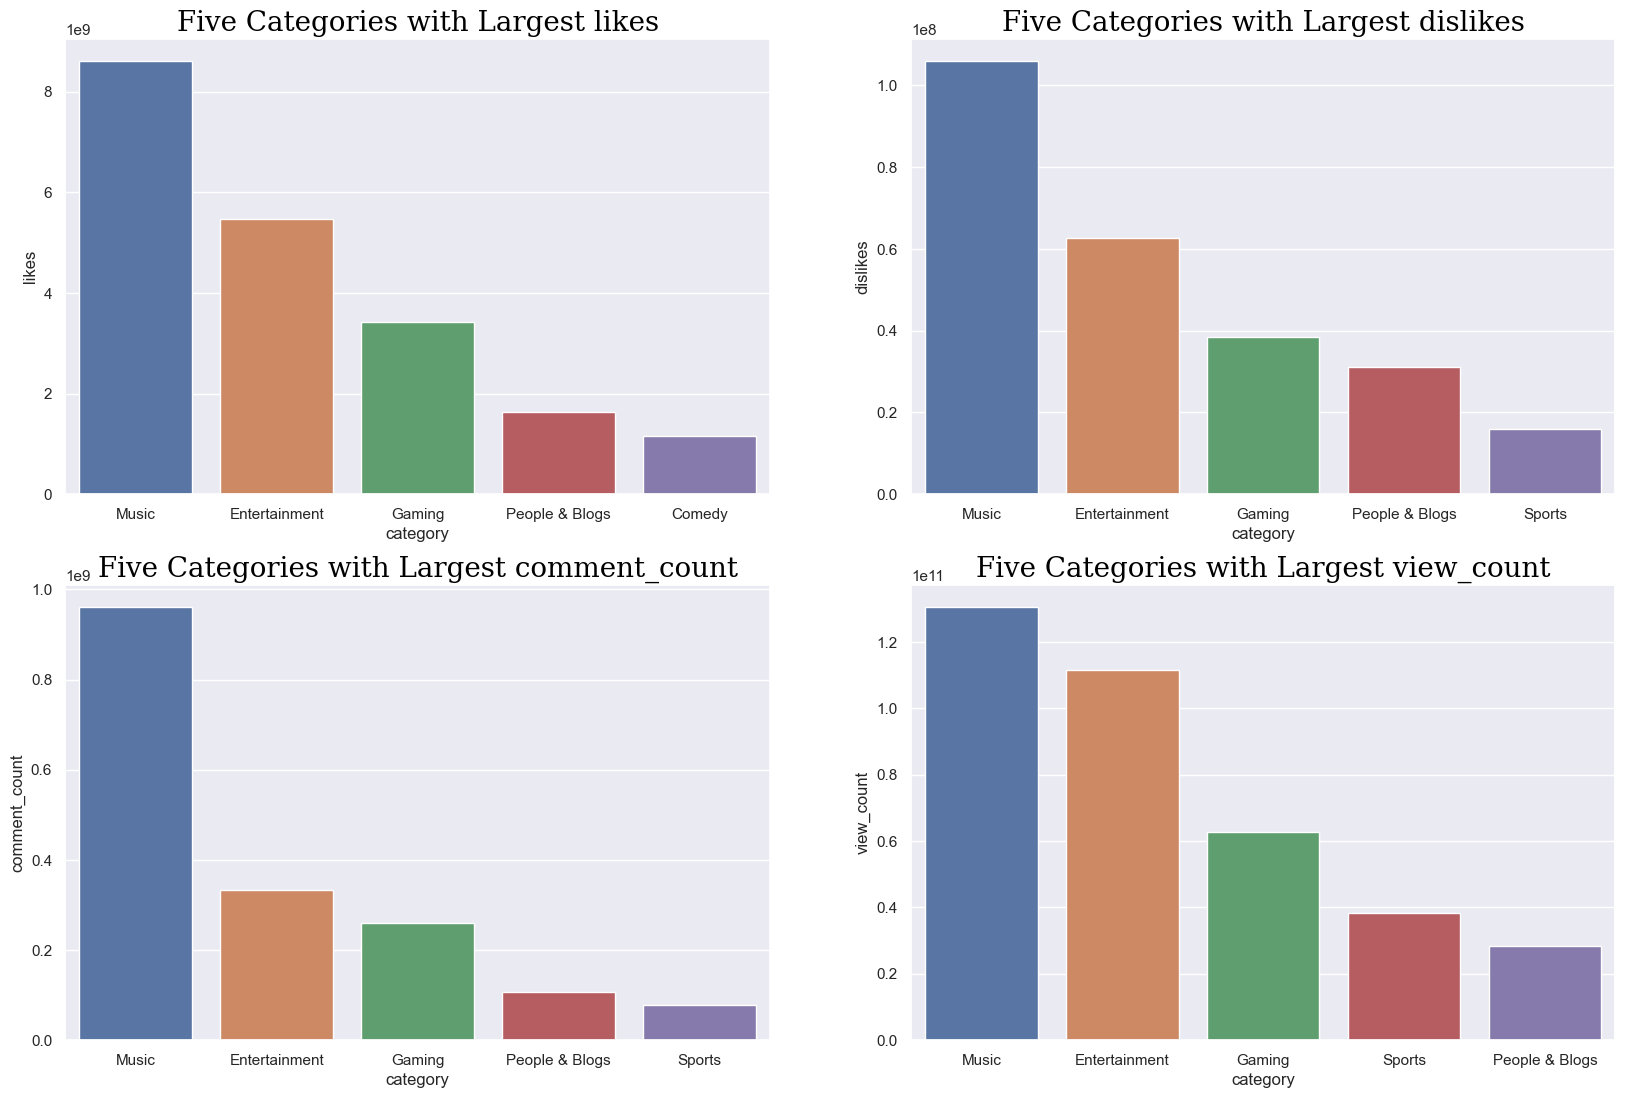

In [30]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','comment_count','view_count',]
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nlargest(5).index
    y = category_group[lst[i]].nlargest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Largest " + lst[i]
    plt.title(title,font)

Based on the diagrams above, the categories that most youtube's users search for on Youtube are music, entertainment, gaming, people, and sports, respectively.

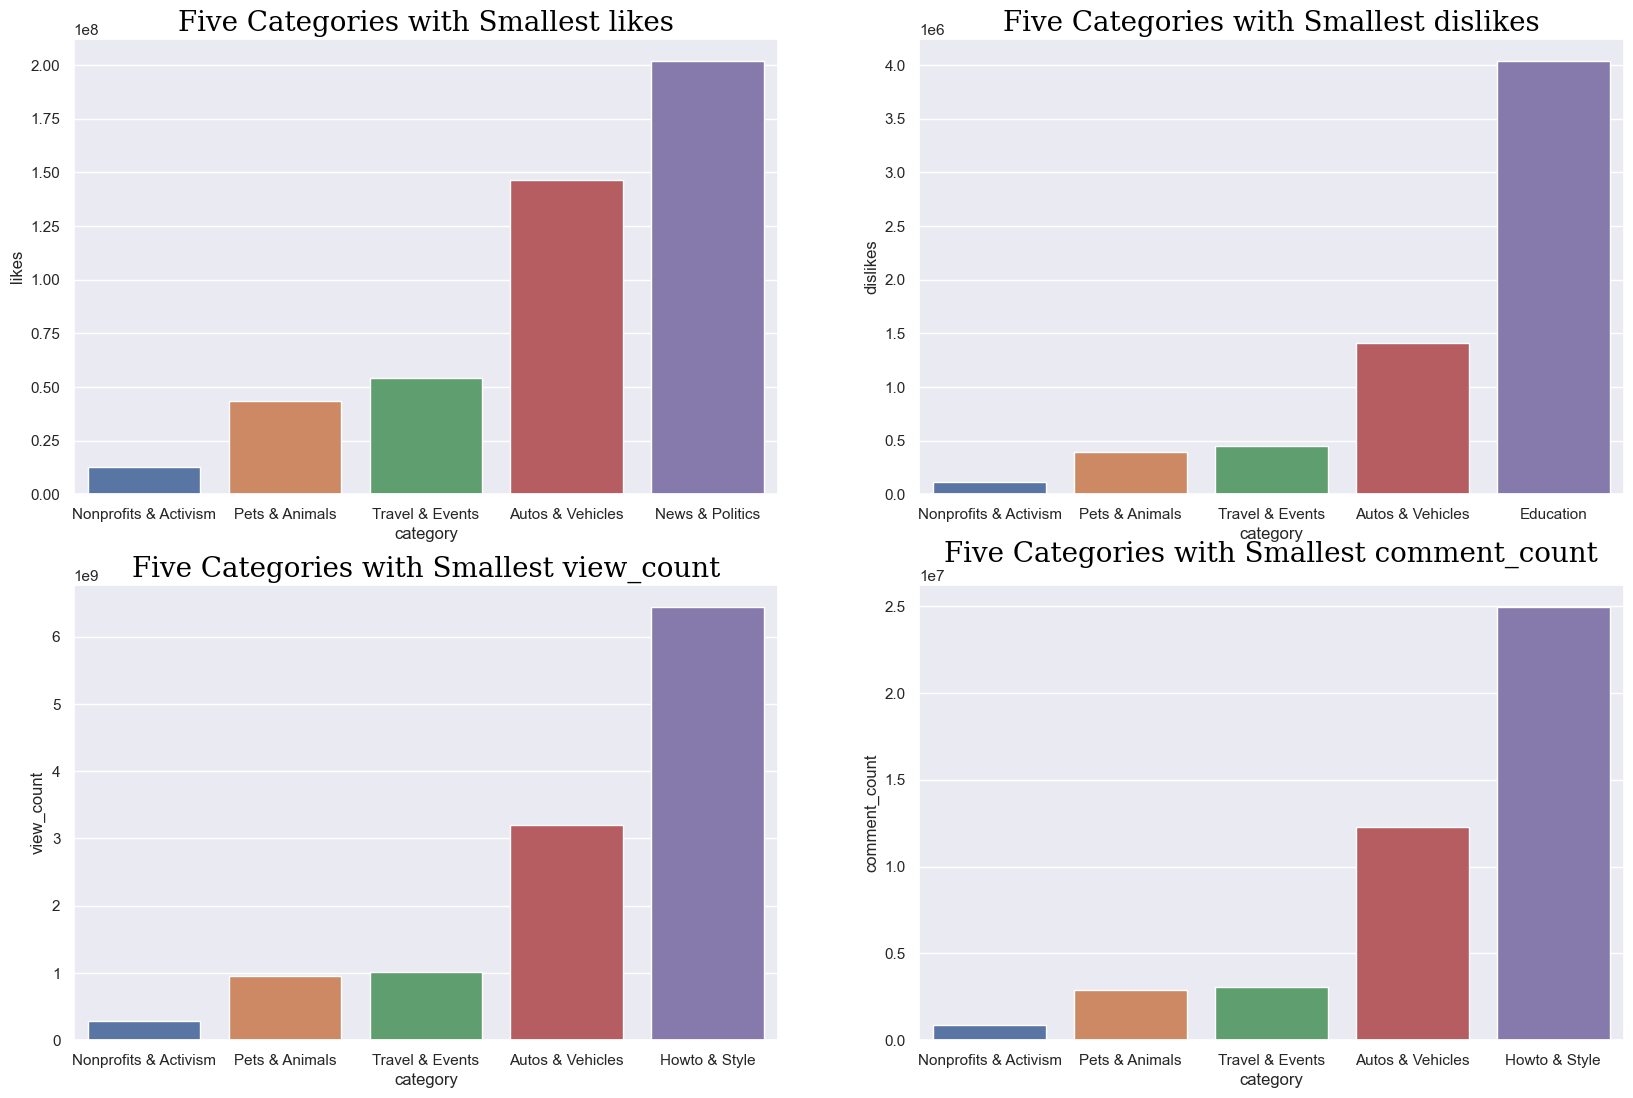

In [31]:
#Plotting the 5 categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','view_count','comment_count']
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nsmallest(5).index
    y = category_group[lst[i]].nsmallest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Smallest " + lst[i]
    plt.title(title,font)


Based on the diagrams above, youtube users are not interested much in the nonprofit, pet & animals, and travels category.